In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = "tourist_arrival.csv" 

# setting the year column as index makes it easier to read the data instead of having to 
# look at a separate column and try to make out the corresponding year

df = pd.read_csv(path, index_col='Year')
print(df)
df.shape

       Jan.   Feb.   Mar.   Apr.   May.   Jun.   Jul.   Aug.   Sep.   Oct.  \
Year                                                                         
1992  17451  27489  31505  30682  29089  22469  20942  27338  24839  42647   
1993  19238  23931  30818  20121  20585  19602  13588  21583  23939  42242   
1994  21735  24872  31586  27292  26232  22907  19739  27610  27959  39393   
1995  22207  28240  34219  33994  27843  25650  23980  27686  30569  46845   
1996  27886  29676  39336  36331  29728  26749  22684  29080  32181  47314   
1997  25585  32861  43177  35229  33456  26367  26091  35549  31981  56272   
1998  28822  37956  41338  41087  35814  29181  27895  36174  39664  62487   
1999  29752  38134  46218  40774  42712  31049  27193  38449  44117  66543   
2000  25307  38959  44944  43635  28363  26933  24480  34670  43523  59195   
2001  30454  38680  46709  39083  28345  13030  18329  25322  31170  41245   
2002  17176  20668  28815  21253  19887  17218  16621  21093  23

(22, 13)

In [13]:
monthly_avg = df.loc[:, 'Jan.':'Dec.'].mean()
print (monthly_avg)
 
# the monthly average from all the years.

Jan.    29457.227273
Feb.    37002.909091
Mar.    46769.772727
Apr.    38054.772727
May.    31734.863636
Jun.    28415.363636
Jul.    27963.454545
Aug.    38669.272727
Sep.    39013.909091
Oct.    59135.136364
Nov.    47352.318182
Dec.    37719.000000
dtype: float64


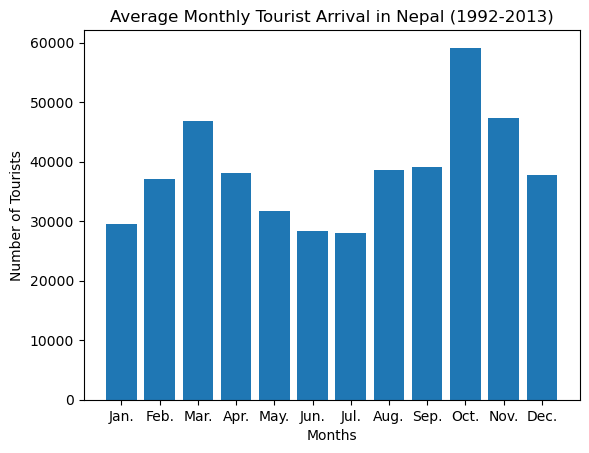

In [14]:
plt.bar(monthly_avg.index, monthly_avg.values)

plt.title("Average Monthly Tourist Arrival in Nepal (1992-2013)")
plt.xlabel("Months")
plt.ylabel("Number of Tourists")

plt.show()

# a bar plot for the number of tourists that arrived each month (Jan - Dec) based on average from all the years.


In [30]:
# a dictionary with seasons as keys and months as values pair.
seasons = {
    "Spring": ["Mar.", "Apr.", "May."],
    "Summer": ["Jun.", "Jul.", "Aug."],
    "Autumn": ["Sep.", "Oct.", "Nov."],
    "Winter": ["Dec.", "Jan.", "Feb."]
}

# using list comprehension to find out the total of each season to find out most and least popular season.
season_totals = {season: df[months].sum().sum() for season, months in seasons.items()}

#using max and min function we can find out from total number the most and least popular seasons for tourist arrival.
most_popular_season = max(season_totals, key=season_totals.get)
least_popular_season = min(season_totals, key=season_totals.get)

print(f"The most popular season is {most_popular_season}")
print(f"The least popular season is {least_popular_season}")


The most popular season is Autumn
The least popular season is Summer


In [52]:
# a dictionary with column months as keys and full name of months as values pair.

month_map = {
    "Jan.": "January",
    "Feb.": "February",
    "Mar.": "March",
    "Apr.": "April",
    "May.": "May",
    "Jun.": "June",
    "Jul.": "July",
    "Aug.": "August",
    "Sep.": "September",
    "Oct.": "October",
    "Nov.": "November",
    "Dec.": "December"
}

# the five worst months using sort and picking out the end five 

worst_months = sorted(df.columns[:-1], key=lambda m: df[m].min())[:5]

# output with full month name and year with the help of join which checks each month with '.' while printing the 
# corresponding year as year is the index

gg = ", ".join("{} {}".format(month_map[month], df[month].idxmin()) for month in worst_months)


print("The five worst months are:", gg+'.')

The five worst months are: June 2001, July 1993, January 2002, December 2001, May 2002.
